# Numerical comparison plots

Figure to summarize numerical comparison results. See [this notebook](https://gaow.github.io/mvarbvs/analysis/20190218_MNM_Benchmark.html) for its input data.

I plan to make 3 types of comparisons: oracle, mismatched and default. In particular I'll put together results from all scenarios (averaged), singleton scenario and shared (with heterogenous effect size), in 3 panels, for 6 quantities:

- size
- purity
- coverage
- power
- per condition FDR
- per condition power

In [1]:
%cd ~/GIT/github/mnm-twas/dsc

/home/gaow/Documents/GIT/github/mnm-twas/dsc

## Load and organize data

In [2]:
res = readRDS('../data/finemap_output.query_result.rds')
res = res[,c(2,4,5,6,7,8,9,10,11,12,13,14,15)]
colnames(res) = c('pattern', 'method', 'total', 'valid', 'size', 'purity', 'top_hit', 'total_true', 'total_true_included', 'overlap', 'false_positive_cross_cond', 'false_negative_cross_cond', 'true_positive_cross_cond')

In [3]:
oracle = "1) oracle"
mismatch = "3) mismatch"
default = "2) default"

## Purity

In [4]:
purity = aggregate(purity~pattern + method, res, mean)
purity$scenario = rep(NA, nrow(purity))
purity$scenario[which(purity$method == purity$pattern & purity$method != 'mixture_1')] = oracle
purity$scenario[which(purity$method != purity$pattern & purity$method != 'mixture_1')] = mismatch
purity$scenario[which(purity$method == "mixture_1")] = default
purity = purity[which(!is.na(purity$scenario)),]
purity_median = aggregate(purity~scenario, purity, median)
purity_median

scenario,purity
1) oracle,0.9837503
2) default,0.9847903
3) mismatch,0.9360424


In [5]:
purity_singleton = purity[which(purity$pattern == 'singleton'),]
purity_median_singleton = aggregate(purity~scenario, purity_singleton, median)
purity_median_singleton

scenario,purity
1) oracle,0.8699070
2) default,0.8568686
3) mismatch,0.8554835


In [6]:
purity_het = purity[which(purity$pattern == 'low_het'),]
purity_median_het = aggregate(purity~scenario, purity_het, median)
purity_median_het

scenario,purity
1) oracle,0.9854448
2) default,0.9851506
3) mismatch,0.9835865


## Size

In [7]:
size = aggregate(size~pattern + method, res, mean)
size$scenario = rep(NA, nrow(size))
size$scenario[which(size$method == size$pattern & size$method != 'mixture_1')] = oracle
size$scenario[which(size$method != size$pattern & size$method != 'mixture_1')] = mismatch
size$scenario[which(size$method == "mixture_1")] = default
size = size[which(!is.na(size$scenario)),]
size_median = aggregate(size~scenario, size, median)
size_singleton = size[which(size$pattern == 'singleton'),]
size_median_singleton = aggregate(size~scenario, size_singleton, median)
size_het = size[which(size$pattern == 'low_het'),]
size_median_het = aggregate(size~scenario, size_het, median)

In [8]:
size_median

scenario,size
1) oracle,9.782
2) default,9.771
3) mismatch,11.613


In [9]:
size_median_singleton

scenario,size
1) oracle,18.366
2) default,17.714
3) mismatch,17.291


In [10]:
size_median_het

scenario,size
1) oracle,8.624
2) default,8.679
3) mismatch,8.797


## Coverage


In [11]:
valid = aggregate(valid ~ pattern + method, res, sum)
total = aggregate(total ~ pattern + method, res, sum)
fdr = merge(valid, total, by = c("pattern", "method"))
fdr$fdr = (fdr$total - fdr$valid)/fdr$total

In [12]:
fdr$scenario = rep(NA, nrow(fdr))
fdr$scenario[which(fdr$method == fdr$pattern & fdr$method != 'mixture_1')] = oracle
fdr$scenario[which(fdr$method != fdr$pattern & fdr$method != 'mixture_1')] = mismatch
fdr$scenario[which(fdr$method == "mixture_1")] = default
fdr = fdr[which(!is.na(fdr$scenario)),]
fdr_mean = aggregate(fdr~scenario, fdr, mean)
fdr_singleton = fdr[which(fdr$pattern == 'singleton'),]
fdr_mean_singleton = aggregate(fdr~scenario, fdr_singleton, mean)
fdr_het = fdr[which(fdr$pattern == 'low_het'),]
fdr_mean_het = aggregate(fdr~scenario, fdr_het, mean)

In [13]:
fdr_mean

scenario,fdr
1) oracle,0.07222584
2) default,0.05729344
3) mismatch,0.07227381


In [14]:
fdr_mean_singleton

scenario,fdr
1) oracle,0.05663717
2) default,0.05464481
3) mismatch,0.08773907


In [15]:
fdr_mean_het

scenario,fdr
1) oracle,0.07048984
2) default,0.05804111
3) mismatch,0.06680457


## Power

In [16]:
total_true_included = aggregate(total_true_included ~ pattern + method, res, sum)
total_true = aggregate(total_true ~ pattern + method, res, sum)
overlap = aggregate(overlap ~ pattern + method, res, mean)
power = merge(total_true_included, total_true, by = c("pattern", "method"))
power = merge(power, overlap,  by = c("pattern", "method"))
power$power = power$total_true_included/power$total_true

In [17]:
power$scenario = rep(NA, nrow(power))
power$scenario[which(power$method == power$pattern & power$method != 'mixture_1')] = oracle
power$scenario[which(power$method != power$pattern & power$method != 'mixture_1')] = mismatch
power$scenario[which(power$method == "mixture_1")] = default
power = power[which(!is.na(power$scenario)),]
power_mean = aggregate(power~scenario, power, mean)
power_singleton = power[which(power$pattern == 'singleton'),]
power_mean_singleton = aggregate(power~scenario, power_singleton, mean)
power_het = power[which(power$pattern == 'low_het'),]
power_mean_het = aggregate(power~scenario, power_het, mean)

In [18]:
power_mean

scenario,power
1) oracle,0.8769862
2) default,0.8623861
3) mismatch,0.8328877


In [19]:
power_mean_singleton

scenario,power
1) oracle,0.6629902
2) default,0.6433824
3) mismatch,0.5791667


In [20]:
power_mean_het

scenario,power
1) oracle,0.9148191
2) default,0.9183197
3) mismatch,0.8991832


## FDR per condition

In [21]:
tp = aggregate(true_positive_cross_cond ~ pattern + method, res, sum)
fp = aggregate(false_positive_cross_cond ~ pattern + method, res, sum)
fdr_cond = merge(tp, fp, by = c("pattern", "method"))
fdr_cond$fdr_cond = fdr_cond$false_positive_cross_cond/(fdr_cond$true_positive_cross_cond + fdr_cond$false_positive_cross_cond)
fdr_cond = fdr_cond[order(fdr_cond$method),]

In [22]:
fdr_cond$scenario = rep(NA, nrow(fdr_cond))
fdr_cond$scenario[which(fdr_cond$method == fdr_cond$pattern & fdr_cond$method != 'mixture_1')] = oracle
fdr_cond$scenario[which(fdr_cond$method != fdr_cond$pattern & fdr_cond$method != 'mixture_1')] = mismatch
fdr_cond$scenario[which(fdr_cond$method == "mixture_1")] = default
fdr_cond = fdr_cond[which(!is.na(fdr_cond$scenario)),]
fdr_cond_mean = aggregate(fdr_cond~scenario, fdr_cond, mean)
fdr_cond_singleton = fdr_cond[which(fdr_cond$pattern == 'singleton'),]
fdr_cond_mean_singleton = aggregate(fdr_cond~scenario, fdr_cond_singleton, mean)
fdr_cond_het = fdr_cond[which(fdr_cond$pattern == 'low_het'),]
fdr_cond_mean_het = aggregate(fdr_cond~scenario, fdr_cond_het, mean)

In [23]:
fdr_cond_mean

scenario,fdr_cond
1) oracle,0.06709568
2) default,0.05656631
3) mismatch,0.16852276


In [24]:
fdr_cond_mean_singleton

scenario,fdr_cond
1) oracle,0.05605787
2) default,0.06099815
3) mismatch,0.73187766


In [25]:
fdr_cond_mean_het

scenario,fdr_cond
1) oracle,0.06042074
2) default,0.05258009
3) mismatch,0.06053400


## Power per condition

In [26]:
tp = aggregate(true_positive_cross_cond ~ pattern + method, res, sum)
fn = aggregate(false_negative_cross_cond ~ pattern + method, res, sum)
power_cond = merge(tp, fn, by = c("pattern", "method"))
power_cond$power_cond = power_cond$true_positive_cross_cond/(power_cond$true_positive_cross_cond + power_cond$false_negative_cross_cond)

In [27]:
power_cond$scenario = rep(NA, nrow(power_cond))
power_cond$scenario[which(power_cond$method == power_cond$pattern & power_cond$method != 'mixture_1')] = oracle
power_cond$scenario[which(power_cond$method != power_cond$pattern & power_cond$method != 'mixture_1')] = mismatch
power_cond$scenario[which(power_cond$method == "mixture_1")] = default
power_cond = power_cond[which(!is.na(power_cond$scenario)),]
power_cond_mean = aggregate(power_cond~scenario, power_cond, mean)
power_cond_singleton = power_cond[which(power_cond$pattern == 'singleton'),]
power_cond_mean_singleton = aggregate(power_cond~scenario, power_cond_singleton, mean)
power_cond_het = power_cond[which(power_cond$pattern == 'low_het'),]
power_cond_mean_het = aggregate(power_cond~scenario, power_cond_het, mean)

In [28]:
power_cond_mean

scenario,power_cond
1) oracle,0.9680900
2) default,0.9850758
3) mismatch,0.8242107


In [29]:
power_cond_mean_singleton

scenario,power_cond
1) oracle,0.9775281
2) default,0.9769231
3) mismatch,0.9368670


In [30]:
power_cond_mean_het

scenario,power_cond
1) oracle,0.9753682
2) default,0.9882653
3) mismatch,0.8107187


Notice the per condition power looks a lot higher than the other analysis, because most powerful tests are for shared effects, which will get counted $R$ times for each signal in per condition analysis, but only are counted one time in overall assessment. Therefore singleton scenarios are relatively more abundant in overall assessment, leading to less powerful tests.

In [31]:
ls()

[1] "default"                   "fdr"                      
 [3] "fdr_cond"                  "fdr_cond_het"             
 [5] "fdr_cond_mean"             "fdr_cond_mean_het"        
 [7] "fdr_cond_mean_singleton"   "fdr_cond_singleton"       
 [9] "fdr_het"                   "fdr_mean"                 
[11] "fdr_mean_het"              "fdr_mean_singleton"       
[13] "fdr_singleton"             "fn"                       
[15] "fp"                        "mismatch"                 
[17] "oracle"                    "overlap"                  
[19] "power"                     "power_cond"               
[21] "power_cond_het"            "power_cond_mean"          
[23] "power_cond_mean_het"       "power_cond_mean_singleton"
[25] "power_cond_singleton"      "power_het"                
[27] "power_mean"                "power_mean_het"           
[29] "power_mean_singleton"      "power_singleton"          
[31] "purity"                    "purity_het"               
[33] "purity_median"             "purity_median_het"        
[35] "purity_median_singleton"   "purity_singleton"         
[37] "res"                       "size"                     
[39] "size_het"                  "size_median"              
[41] "size_median_het"           "size_median_singleton"    
[43] "size_singleton"            "total"                    
[45] "total_true"                "total_true_included"      
[47] "tp"                        "valid"

In [32]:
output = list(fdr_cond=fdr_cond_mean, fdr_cond_het=fdr_cond_mean_het, fdr_cond_singleton=fdr_cond_mean_singleton,
             fdr=fdr_mean, fdr_het=fdr_mean_het, fdr_singleton=fdr_mean_singleton, 
             power_cond=power_cond_mean, power_cond_het=power_cond_mean_het, power_cond_singleton=power_cond_mean_singleton,
             power=power_mean, power_het=power_mean_het, power_singleton=power_mean_singleton,
             purity=purity_median, purity_het=purity_median_het, purity_singleton=purity_median_singleton,
             size=size_median, size_het=size_median_het, size_singleton=size_median_singleton)
saveRDS(output, '../data/finemap_output.summarized_result.rds')

## Make plot

In [33]:
output = readRDS('../data/finemap_output.summarized_result.rds')

In [34]:
get_table = function(output, key) {
    dat = Reduce(function(x, y) merge(x, y, by = 'scenario'), list(output[[key]], output[[paste0(key,'_het')]], output[[paste0(key,'_singleton')]]))
    dat = reshape2::melt(dat, id.vars = c("scenario"))
    dat$variable = NULL
    dat = cbind(dat, c(rep('overall',3), rep('shared',3), rep('singleton',3)))
    #dat = cbind(dat, c(1,1,1,2,2,2,3,3,3))
    #dat = cbind(dat, c(2,3,1,2,3,1,2,3,1))
    #names(dat) = c('method', key, 'scenario', 'o1', 'o2')
    names(dat) = c('method', key, 'scenario')
    return(dat)
}

In [35]:
colors = RColorBrewer::brewer.pal(n = 8, name = "Set1")
colors

[1] "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3" "#FF7F00" "#FFFF33" "#A65628"
[8] "#F781BF"

In [36]:
library(lattice)
default_panel = function(x, y, ...) {
    panel.points(x, y, col=THE_COLOR, pch=16, cex=1.1)
}
W = 3.2
H2 = 4
H1 = 2.9

## Size

In [37]:
size = get_table(output, 'size')

In [38]:
pdf('1.pdf', width=W, height=H1)
THE_COLOR=colors[3]
dotplot(size ~ method | scenario, data=size,  
        auto.key=list(columns=2), scale=list(alternating=1, x = list(draw=F)), 
        layout = c(3,1), angle = 45, panel=default_panel,
        xlab="", ylab = "Median number of variables")
dev.off()

png 
  2

In [39]:
size

method,size,scenario
1) oracle,9.782,overall
2) default,9.771,overall
3) mismatch,11.613,overall
1) oracle,8.624,shared
2) default,8.679,shared
3) mismatch,8.797,shared
1) oracle,18.366,singleton
2) default,17.714,singleton
3) mismatch,17.291,singleton


In [40]:
output$size

scenario,size
1) oracle,9.782
2) default,9.771
3) mismatch,11.613


In [41]:
output$size_singleton

scenario,size
1) oracle,18.366
2) default,17.714
3) mismatch,17.291


In [42]:
output$size_het

scenario,size
1) oracle,8.624
2) default,8.679
3) mismatch,8.797


> 1.pdf (4.6 KiB):

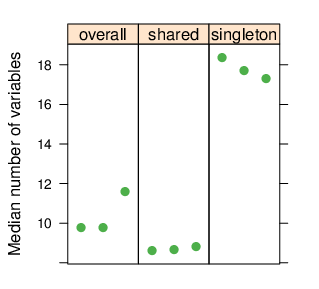

In [43]:
%preview 1.pdf -s png --dpi 100

## Purity

In [44]:
purity = get_table(output, 'purity')

In [45]:
pdf('2.pdf', width=W, height=H1)
THE_COLOR=colors[2]
dotplot(purity ~ method | scenario, data=purity,  
        auto.key=list(columns=2), scale=list(alternating=1, x = list(draw = F)), 
        layout = c(3,1), angle = 45, panel=default_panel, ylim = c(0.8,1),
        xlab="", ylab = "Minimum absolute correlation")
dev.off()

png 
  2

> 2.pdf (4.6 KiB):

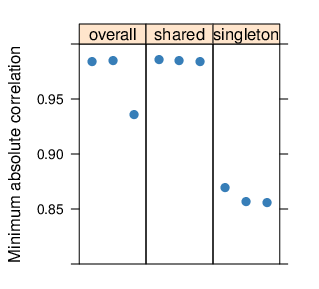

In [46]:
%preview 2.pdf -s png --dpi 100

## Overall FDR of CS

In [47]:
fdr = get_table(output, 'fdr')

In [48]:
pdf('3.pdf', width=W, height=H1)
THE_COLOR = colors[1]
my_panel = function(x, y, subscripts, ...) {
    panel.points(x, y, col=THE_COLOR, pch=16, cex=1.1)
    panel.abline(h=0.05, col = "#800000", lty = 2)
}
dotplot(fdr ~ method | scenario, data=fdr,  
        auto.key=list(columns=2), scales=list(alternating=1, x = list(draw = F)), 
        layout = c(3,1), angle = 45, panel = my_panel,
        xlab="", ylab = "Cross-condition FDR", ylim = c(0,0.5))
dev.off()

png 
  2

> 3.pdf (4.6 KiB):

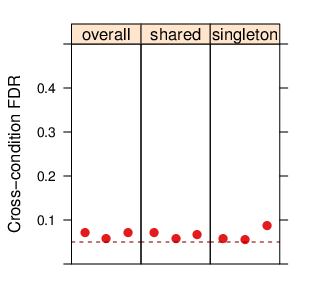

In [49]:
%preview 3.pdf -s png --dpi 100

## Overall power of CS

In [50]:
power = get_table(output, 'power')
pdf('4.pdf', width=W, height=H2)
THE_COLOR = colors[4]
dotplot(power ~ method | scenario, data=power,  
        auto.key=list(columns=2), scales=list(alternating=1, x = list(rot = 45)),
        layout = c(3,1), angle = 45, panel = default_panel,
        xlab="Method", ylab = "Cross-condition power", ylim = c(0.4,1))
dev.off()

png 
  2

> 4.pdf (4.8 KiB):

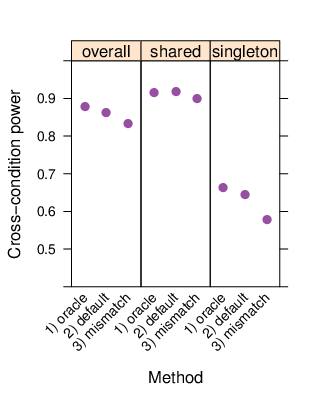

In [51]:
%preview 4.pdf -s png --dpi 100

## Condition specific FDR of CS using lfsr filters

In [52]:
fdr_cond = get_table(output, 'fdr_cond')
pdf('5.pdf', width=W, height=H2)
THE_COLOR = colors[5]
dotplot(fdr_cond ~ method | scenario, data=fdr_cond,  
        auto.key=list(columns=2), scales=list(alternating=1, x = list(rot = 45)),
        layout = c(3,1), angle = 45, panel = my_panel, ylim = c(0,0.8),
        xlab="Method", ylab = "Condition specific FDR (for lfsr<0.05)")
dev.off()

png 
  2

> 5.pdf (4.8 KiB):

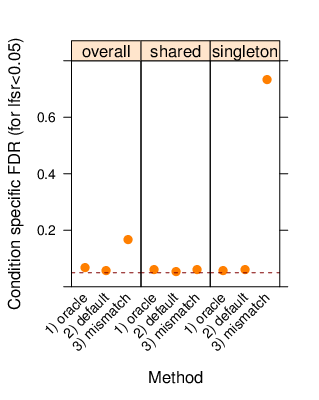

In [53]:
%preview 5.pdf -s png --dpi 100

## Condition specific power for CS using lfsr filters

In [54]:
power_cond = get_table(output, 'power_cond')
pdf('6.pdf', width=W, height=H2)
THE_COLOR = colors[8]
dotplot(power_cond ~ method | scenario, data=power_cond,  
        auto.key=list(columns=2), scales=list(alternating=1, x = list(rot = 45)),
        layout = c(3,1), angle = 45, panel = default_panel, ylim = c(0.7,1),
        xlab="Method", ylab = "Condition specific power (for lfsr<0.05)")
dev.off()

png 
  2

> 6.pdf (4.8 KiB):

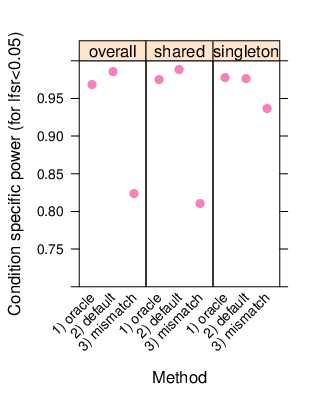

In [55]:
%preview 6.pdf -s png --dpi 100

In [56]:
mkdir -p finemap_output
convert -density 500 -quality 100 \
        \( 1.pdf 2.pdf 3.pdf -density 500 -quality 100 +append \) \
        \( 4.pdf 5.pdf 6.pdf +append \) \
        -append finemap_output/finemap_output_comparisons.png # add parameter -flatten to make it non-transparent

> finemap_output/finemap_output_comparisons.png (190.1 KiB):

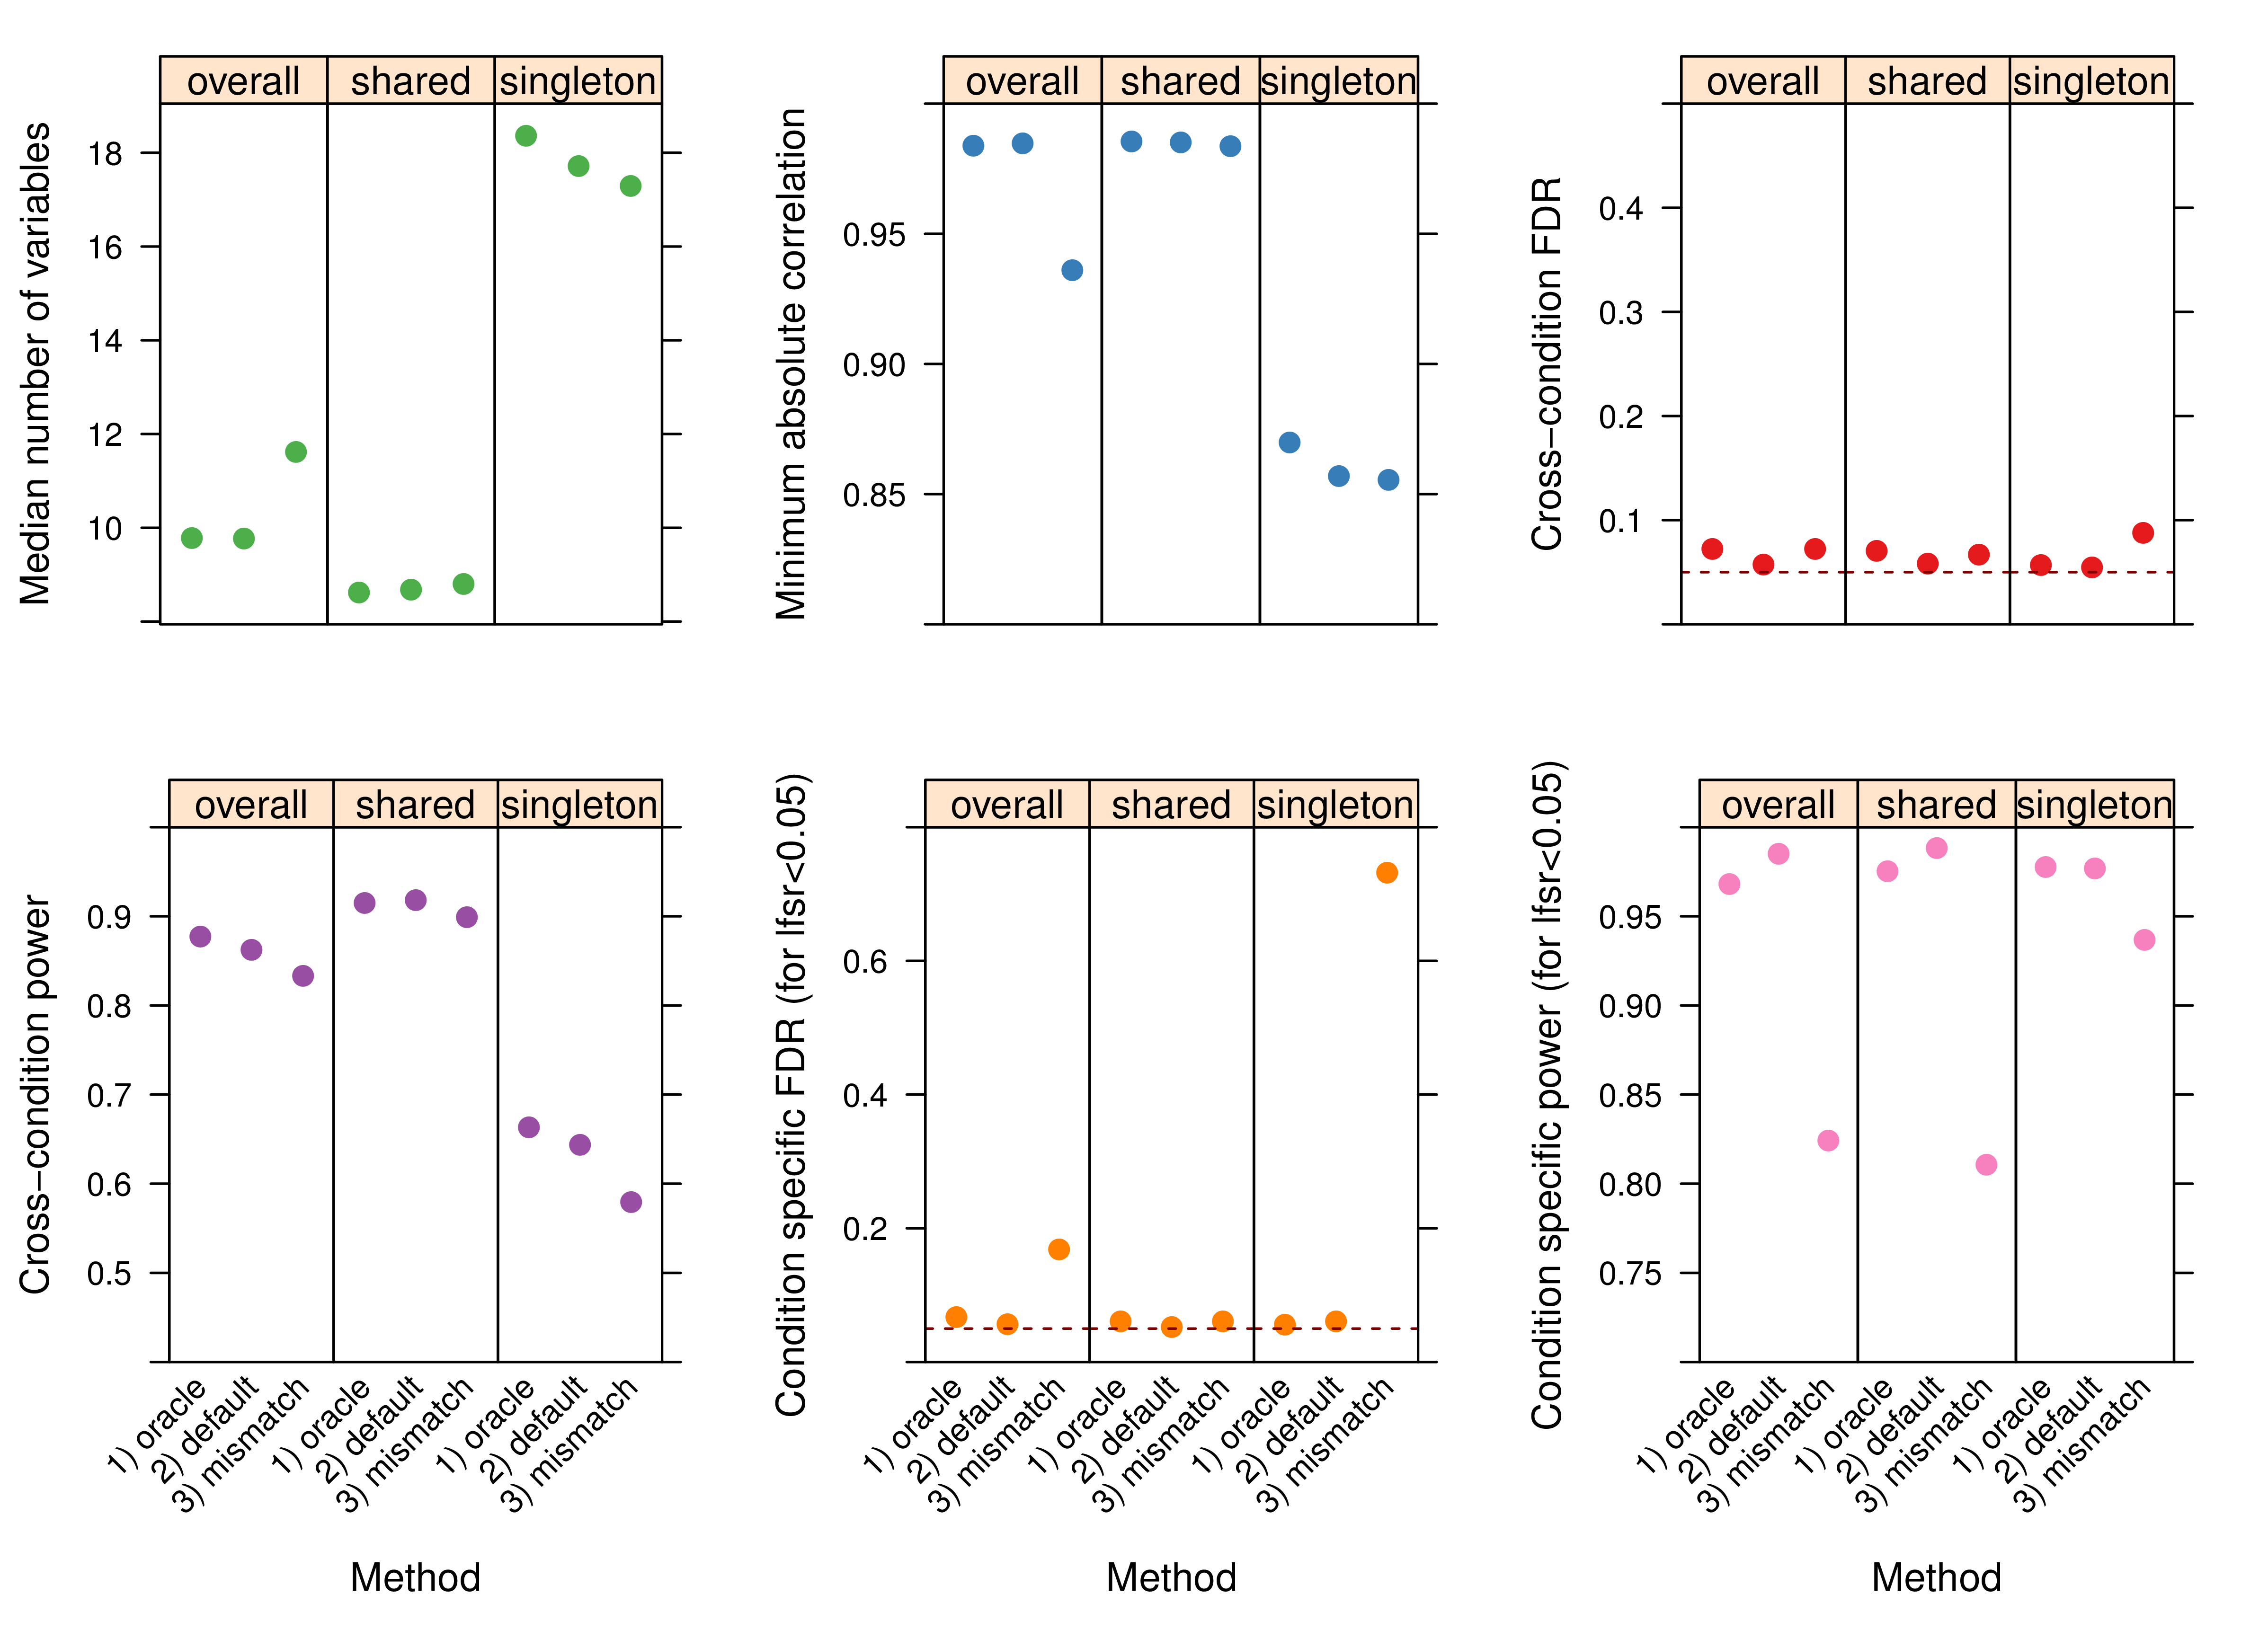

In [57]:
%preview finemap_output/finemap_output_comparisons.png --width 50%